# Emmanuel Premius Horo

**Exploratory Data Analysis - Terrorism**

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding = 'ISO-8859-1')
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,197203110001,1972,3,11,NaN,0,NaN,217,United States,1,...,The Jewish Resistance Assault Team is likely a...,"""Fire Bombers Said To Pick Wrong Home,"" New Yo...","Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,0.0,0.0,0.0,0.0,NaN
1206,197203120001,1972,3,12,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0.0,0.0,1.0,1.0,NaN
1207,197203130001,1972,3,13,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0.0,0.0,1.0,1.0,NaN
1208,197203150001,1972,3,15,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0.0,0.0,1.0,1.0,NaN


In [ ]:
# Information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Columns: 135 entries, eventid to related
dtypes: float64(79), int64(7), object(49)
memory usage: 1.2+ MB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Displaying the columns
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
# Concise summary of dataset

df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.210000e+03,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1190.000000,1190.000000,1209.000000,...,0.0,7.000000,0.0,0.0,57.000000,44.000000,1209.000000,1209.000000,1209.000000,1209.000000
mean,1.970593e+11,1970.534711,5.662810,14.782645,0.029752,248.118182,3.382645,34.806398,-59.408396,1.075269,...,NaN,116714.285714,NaN,NaN,2.456140,19.954545,-4.604632,-4.496278,0.277916,-3.555831
std,6.215254e+07,0.628153,3.295036,9.185877,0.169973,139.745770,3.410905,20.475755,55.349643,0.529080,...,NaN,131347.775372,NaN,NaN,0.946236,49.230806,4.553673,4.680366,0.757206,4.793283
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,11.000000,1.000000,-37.813187,-157.818968,1.000000,...,NaN,12000.000000,NaN,NaN,2.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.970053e+11,1970.000000,3.000000,6.000000,0.000000,217.000000,1.000000,34.097866,-95.365295,1.000000,...,NaN,47500.000000,NaN,NaN,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.970112e+11,1970.000000,5.000000,15.000000,0.000000,217.000000,1.000000,39.930771,-73.931351,1.000000,...,NaN,100000.000000,NaN,NaN,2.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000
75%,1.971061e+11,1971.000000,8.000000,23.000000,0.000000,217.000000,8.000000,42.464047,-5.981749,1.000000,...,NaN,105000.000000,NaN,NaN,2.000000,3.250000,0.000000,0.000000,1.000000,1.000000
max,1.972032e+11,1972.000000,12.000000,31.000000,1.000000,603.000000,12.000000,59.332788,151.206890,5.000000,...,NaN,400000.000000,NaN,NaN,5.000000,187.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Checking for null values
df.isnull().sum()

eventid          0
iyear            0
imonth           0
iday             0
approxdate    1198
              ... 
INT_LOG          1
INT_IDEO         1
INT_MISC         1
INT_ANY          1
related       1084
Length: 135, dtype: int64

In [ ]:
# Renaming columns

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'
                    },inplace=True)

## **Yearly Plot**

In [ ]:
# As we have many columns, we take the columns that are necessary for analysis
df = df[['eventid','Year','Month','Day','Country','Region','state','city','latitude','longitude','AttackType','Killed','Wounded',
            'Target','Summary','Group','Target_type','Weapon_type','Motive','success']]

In [ ]:
df.head()

,eventid,Year,Month,Day,Country,Region,state,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1.0
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1.0
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1.0


In [ ]:
df.isnull().sum()

eventid          0
Year             0
Month            0
Day              0
Country          0
Region           0
state            2
city             0
latitude        20
longitude       20
AttackType       1
Killed         115
Wounded        237
Target          29
Summary        668
Group            1
Target_type      1
Weapon_type      1
Motive         852
success          1
dtype: int64

In [ ]:
df1= df.dropna(axis=0)

In [ ]:
df.head(5)

,eventid,Year,Month,Day,Country,Region,state,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1.0
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1.0
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1.0


## **EDA**

In [ ]:
year_attacks = df.groupby('Year').size().reset_index(name='count')

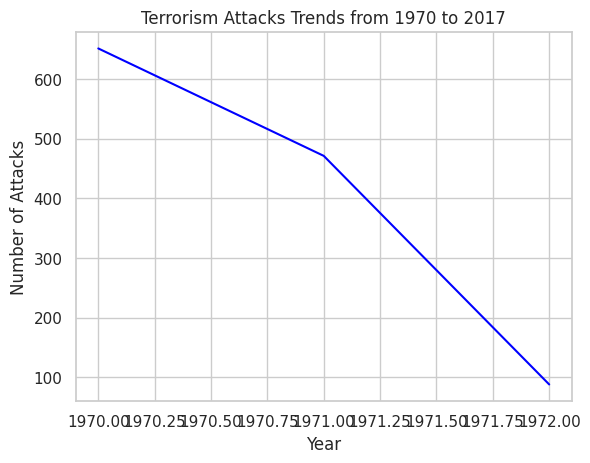

In [ ]:
sns.lineplot(x='Year', y='count', data=year_attacks, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title("Terrorism Attacks Trends from 1970 to 2017")
plt.show()

In [ ]:
year_attacks_region = df.groupby(['Year','Region']).size().reset_index(name='count')

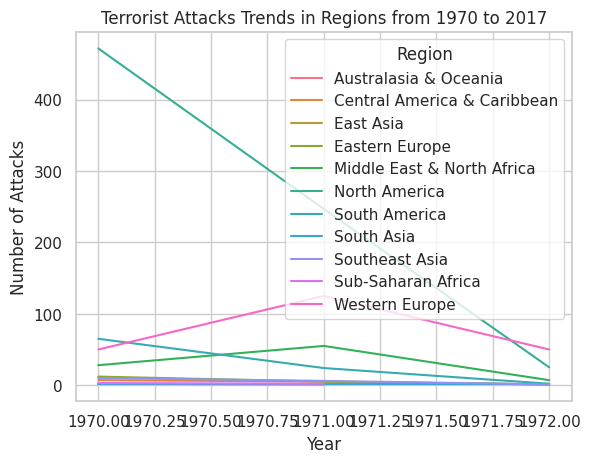

In [ ]:
sns.lineplot(x='Year',y='count',hue='Region',data=year_attacks_region)
plt.title('Terrorist Attacks Trends in Regions from 1970 to 2017')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

### **Top 10 countries most affected**

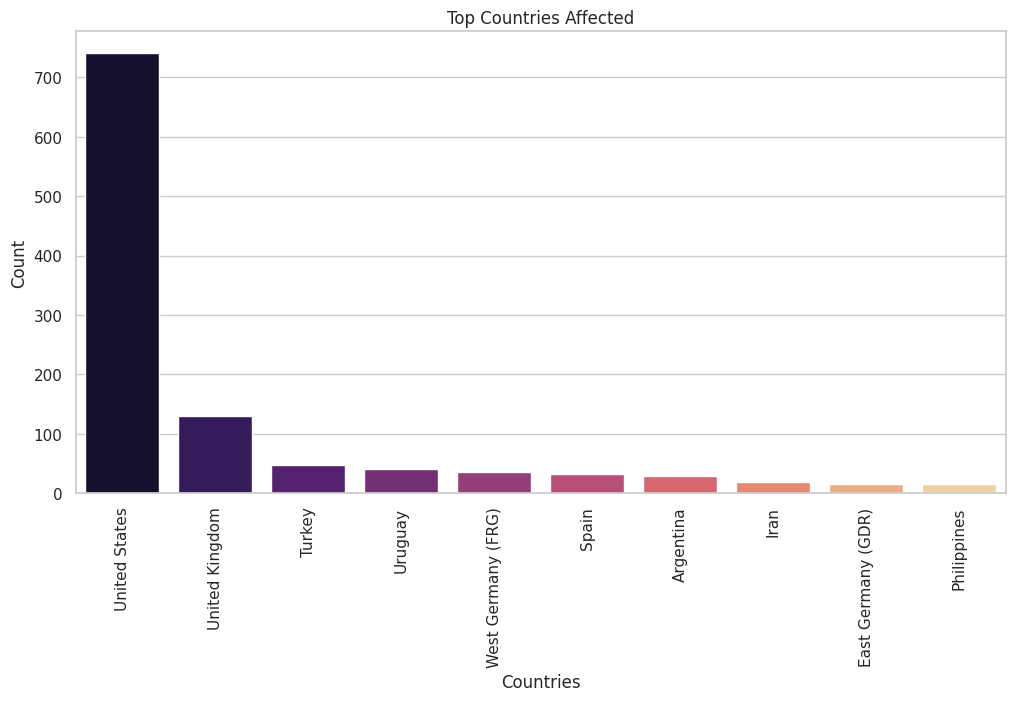

In [ ]:
plt.subplots(figsize=(12,6))
top=df['Country'].value_counts()[:10].to_frame().reset_index()
top.columns= ['Country','Attacks_Counts']
sns.barplot(x='Country',y='Attacks_Counts', data= top, palette='magma')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

From the graph we can see the most affected country with terrorism are:

1. United States
2. United kingdom
3. Turkey
4. Uruguay
5. West Germany(FRG)

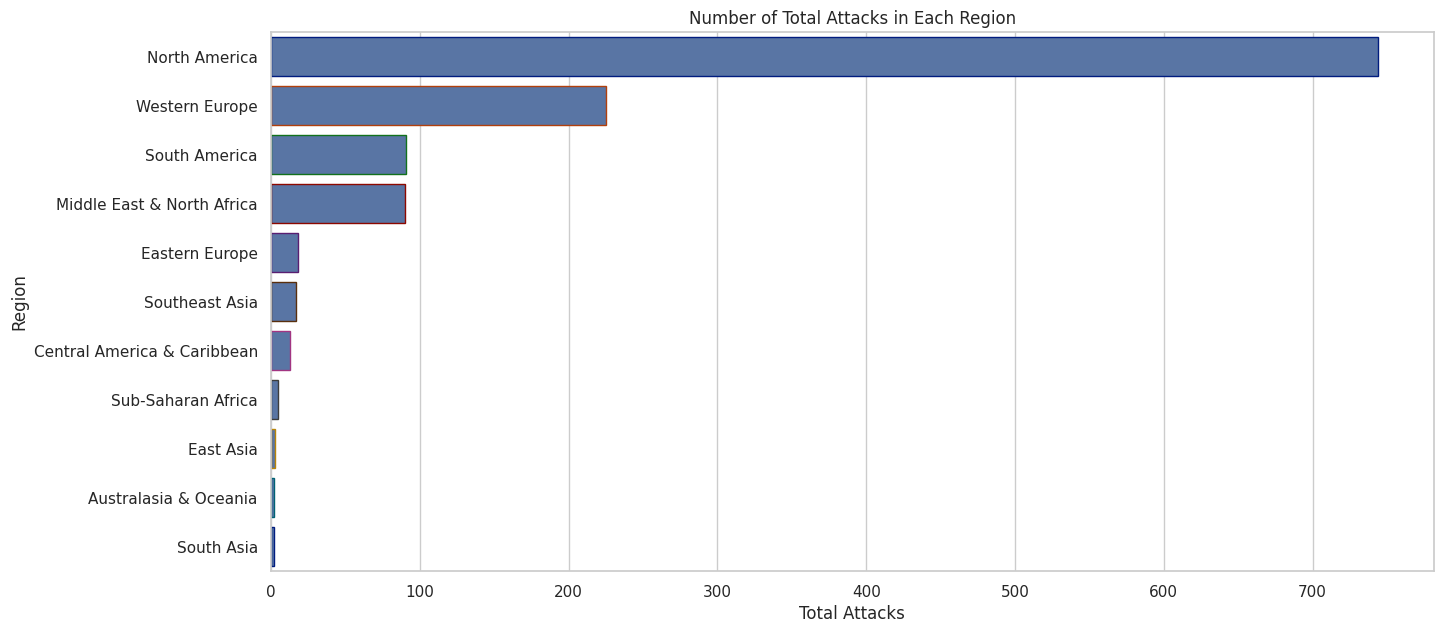

In [ ]:
# Region wise attacks
region_attacks= df.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(15,7))
sns.barplot(x=region_attacks['Total Attacks'], y=region_attacks.Region, edgecolor=sns.color_palette('dark',10),orient='h')
plt.title('Number of Total Attacks in Each Region')
plt.show()

**The most affected region is North America followed by Western Europe and South America in the Third position**

In [ ]:
# Attacks basaed on the region

region_attack_counts = df.groupby(['Region', 'AttackType']).size().reset_index()
region_attack_counts.columns = ['Region', 'AttackType', 'Attack Count']

region = df.Region.unique()

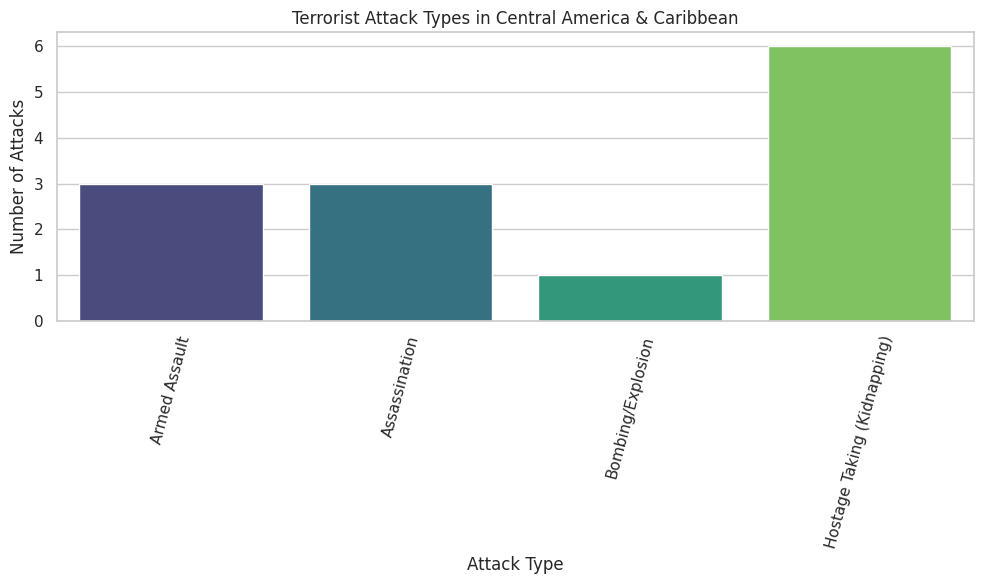

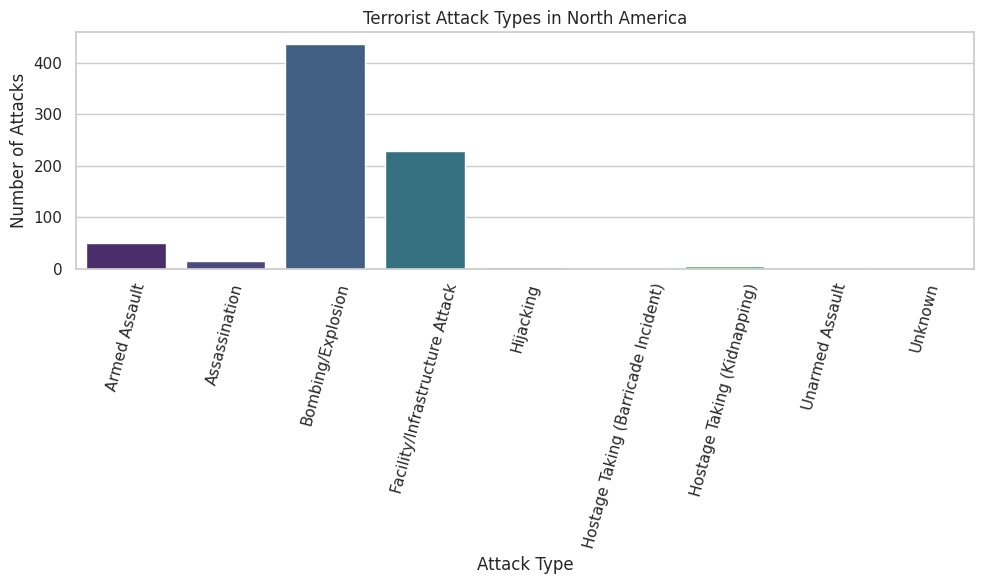

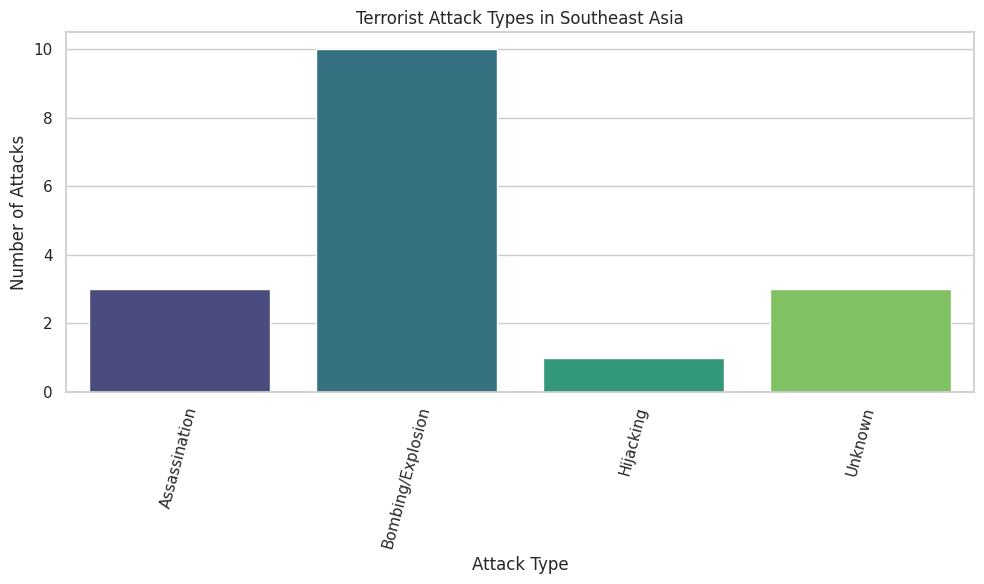

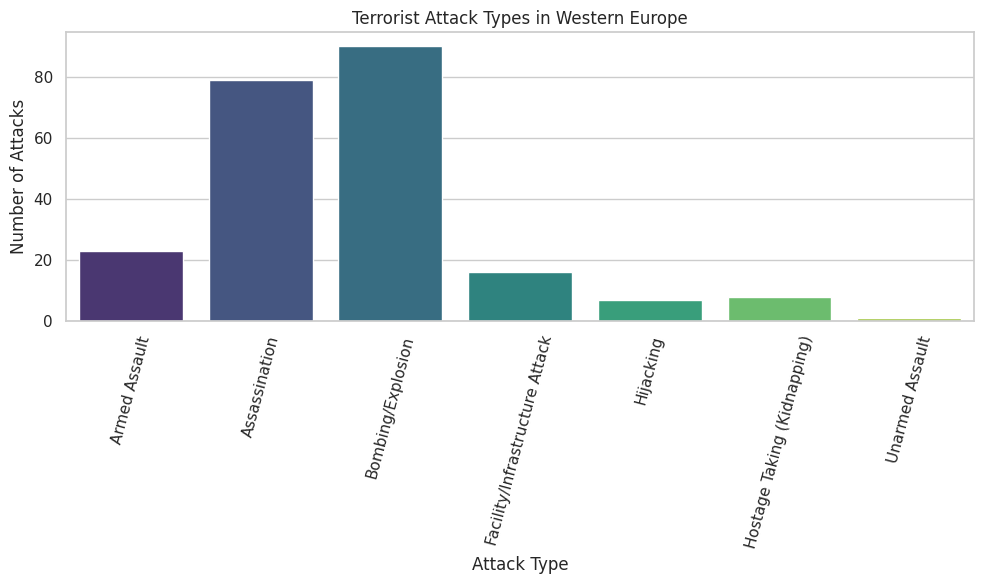

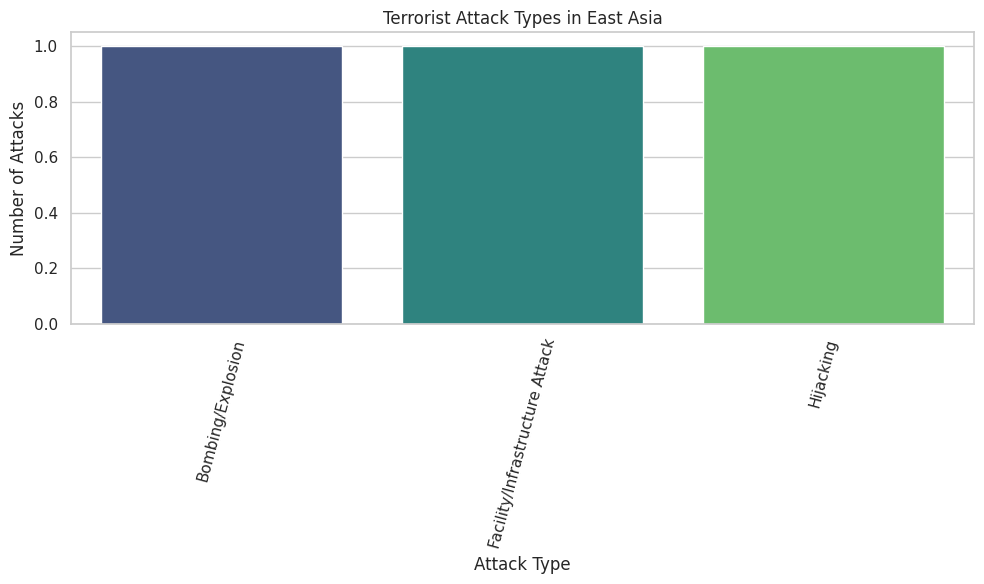

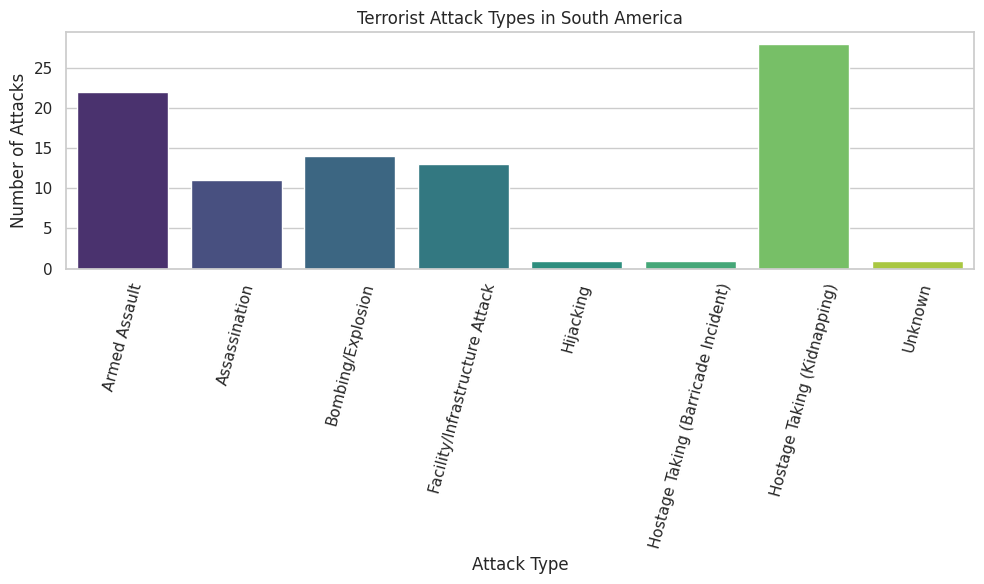

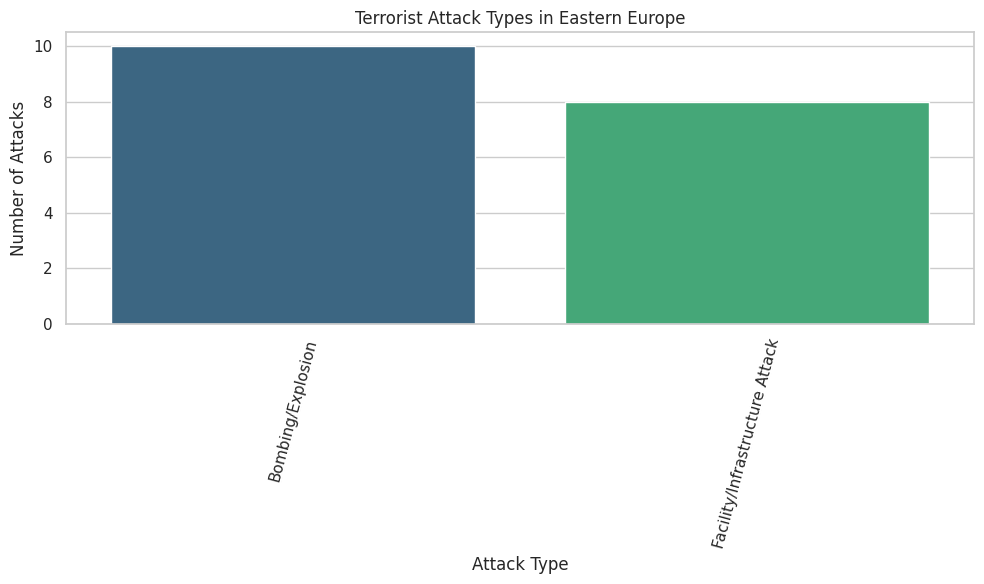

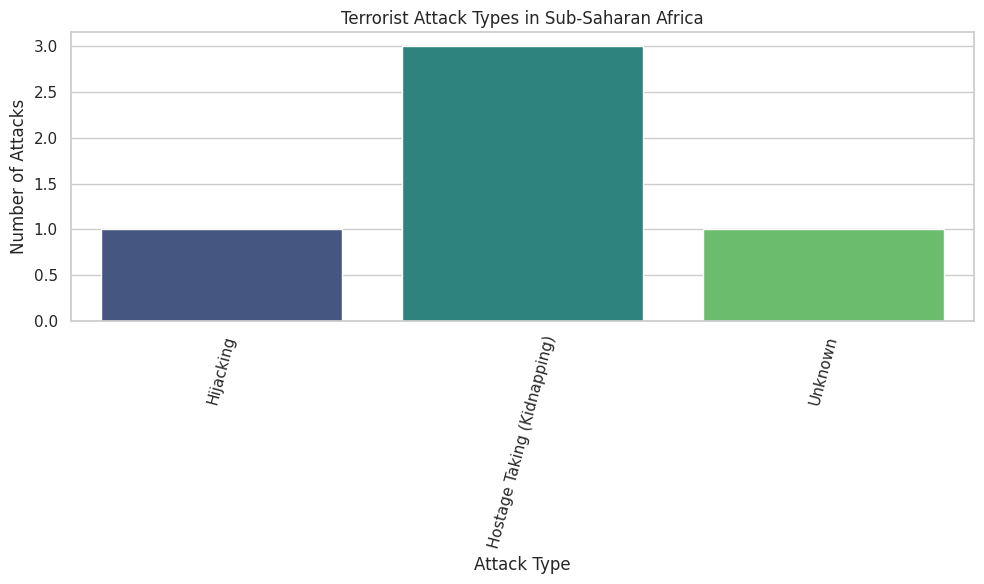

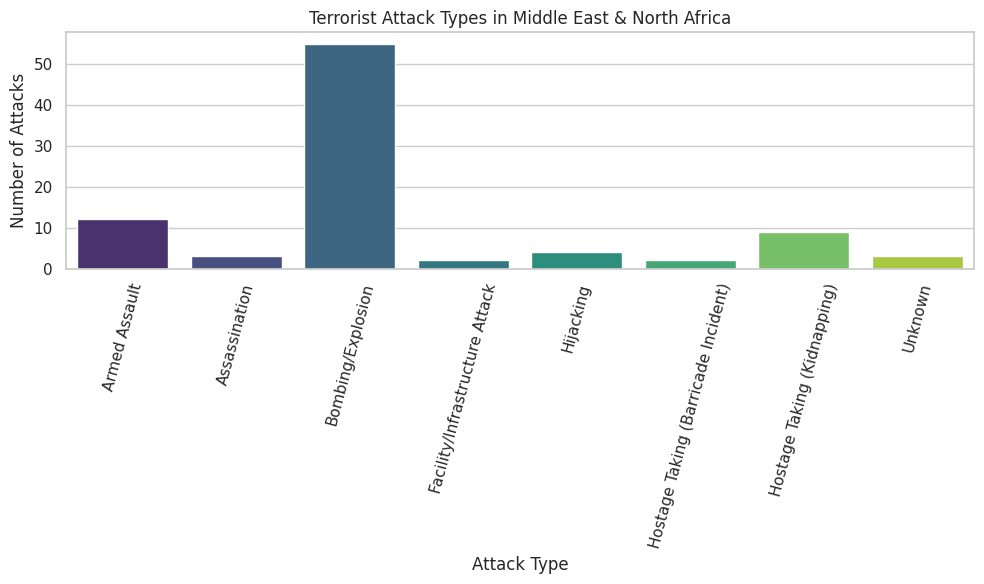

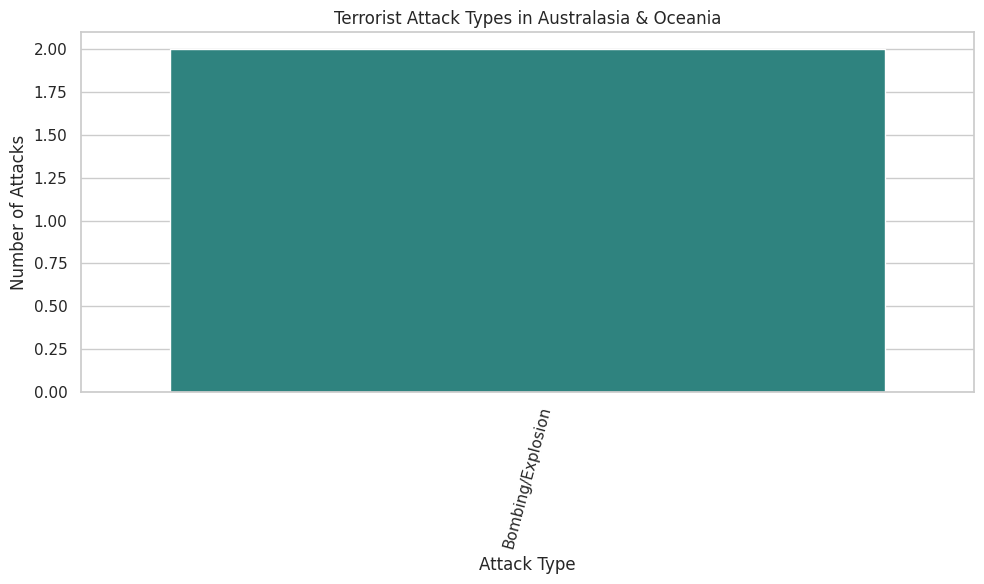

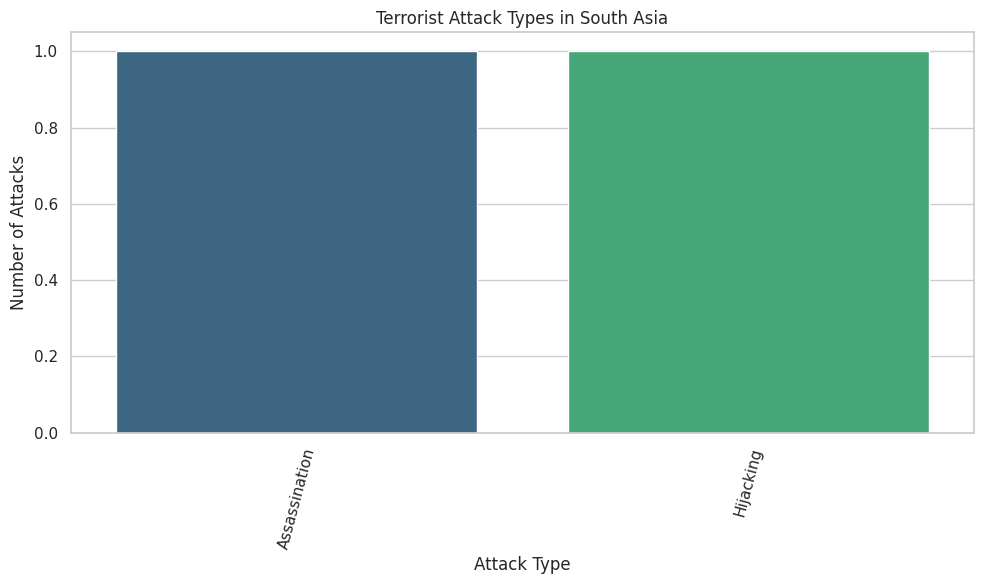

In [ ]:
# Attack type specific to region wise

def region_attack_type(region):
    sns.set(style="whitegrid")

    for i in region:
        selected_region = i

        # Filter the data for the selected region
        selected_region_data = region_attack_counts[region_attack_counts['Region'] == selected_region]

        # Create the bar plot
        plt.figure(figsize=(10, 6))
        sns.barplot(data=selected_region_data, x='AttackType', y='Attack Count', palette="viridis")
        plt.title(f'Terrorist Attack Types in {selected_region}')
        plt.xlabel('Attack Type')
        plt.ylabel('Number of Attacks')
        plt.xticks(rotation=75)
        plt.tight_layout()

        plt.show()

region_attack_type(region)


**Bombing/Explosion is the most common type of terrorist attack, but in the region of Australia and Oceania' : 'Assassination and Hijacking' are more frequent and in the region of South Asia .**

In [ ]:
# lets see the different groups activities and their motives and method of attacking

groups = df[['AttackType','Group','Weapon_type','Target_type']]

In [ ]:
groups

,AttackType,Group,Weapon_type,Target_type
0,Assassination,MANO-D,Unknown,Private Citizens & Property
1,Hostage Taking (Kidnapping),23rd of September Communist League,Unknown,Government (Diplomatic)
2,Assassination,Unknown,Unknown,Journalists & Media
3,Bombing/Explosion,Unknown,Explosives,Government (Diplomatic)
4,Facility/Infrastructure Attack,Unknown,Incendiary,Government (Diplomatic)
...,...,...,...,...
1205,Facility/Infrastructure Attack,Jewish Armed Resistance,Incendiary,Private Citizens & Property
1206,Assassination,Official Irish Republican Army (OIRA),Firearms,Military
1207,Assassination,Ulster Volunteer Force (UVF),Firearms,Private Citizens & Property
1208,Assassination,Irish Republican Army (IRA),Firearms,Police


In [ ]:
group_counts = groups['Group'].value_counts()
sort = group_counts.sort_values(ascending=False)

# Select the top 5 most frequent groups
sort = sort.iloc[1:]
top_5 = sort.head(5)

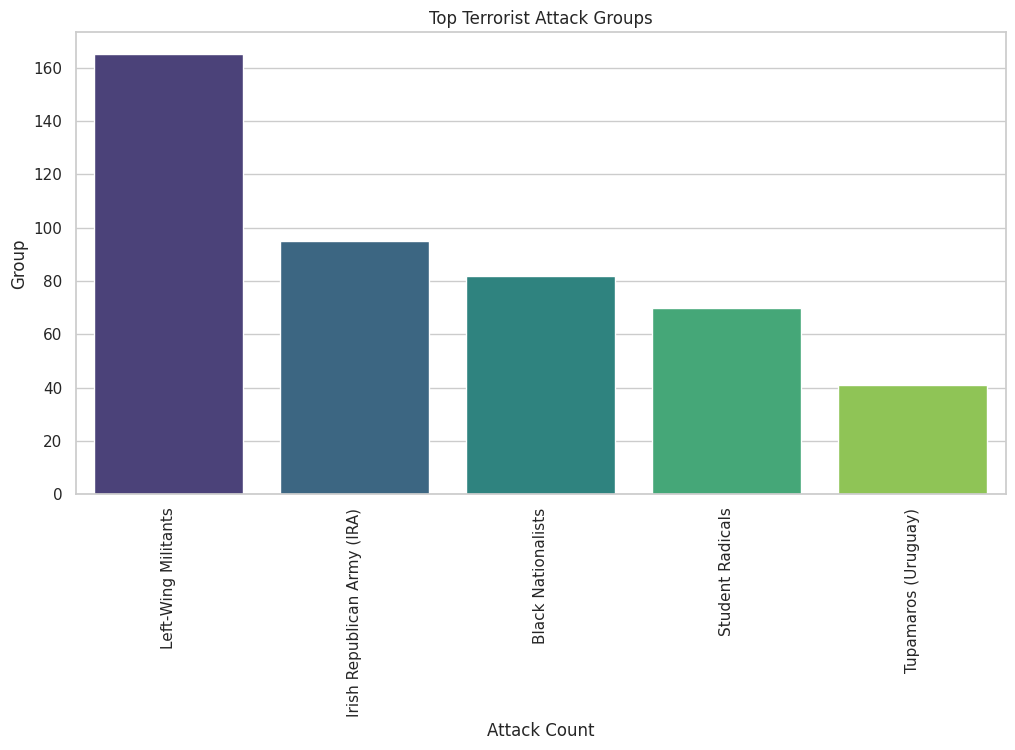

In [ ]:
# Plotting top 5 terrorists groups

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5.index, y=top_5.values, palette="viridis")
plt.title('Top Terrorist Attack Groups')
plt.xlabel('Attack Count')
plt.ylabel('Group')
plt.xticks(rotation = 90)
plt.show()

### **Left-Wing Militants is the most active terrorist group around the world.**

In [ ]:
# Correlation between Country and Attack Counts

import plotly.express as px

# Group the data by country and count the number of attacks
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Attack Count']

# Create the choropleth map
fig = px.choropleth(country_counts,locations='Country',locationmode='country names', color='Attack Count',
                    title='Terrorist Attacks by Country',
                    labels={'Attack Count': 'Number of Attacks'},
                    hover_name='Country',color_continuous_scale='Blues')

fig.show()

In [ ]:
# If we tabularise this map

corr_data = df.groupby('Country').agg({'Country': 'count', 'Killed': 'sum', 'Wounded': 'sum'})
corr_data.columns = ['Total Attacks', 'Total Killed', 'Total Wounded']
corr_data.reset_index(inplace=True)

corr_data['Casualties'] = corr_data['Total Killed']+corr_data['Total Wounded']
corr_data.drop(['Total Killed', 'Total Wounded'],axis = 1,inplace = True)

In [ ]:
corr_data.sort_values('Total Attacks',inplace=True,ascending= False )
corr_data

,Country,Total Attacks,Casualties
41,United States,740,286.0
40,United Kingdom,130,413.0
39,Turkey,48,2.0
42,Uruguay,41,4.0
45,West Germany (FRG),36,18.0
35,Spain,33,0.0
0,Argentina,29,12.0
18,Iran,19,5.0
12,East Germany (GDR),16,0.0
32,Philippines,15,54.0


### **Success rate of terrorist attacks**

In [ ]:
noa = df.groupby('Year').size().reset_index(name='count')
noa

,Year,count
0,1970,651
1,1971,471
2,1972,88


In [ ]:
# Calculating the total number of attacks
sum_of_attacks = noa['count'].sum()
print('Total number of attacks all over the world:', sum_of_attacks)

Total number of attacks all over the world: 1210


In [ ]:
# Calculating the success rate
succ = df.groupby(['success']).size().reset_index(name='count')
succ['percentage'] =  succ['count']/sum_of_attacks *100
succ

,success,count,percentage
0,0.0,170,14.049587
1,1.0,1039,85.867769


Text(0.5, 0, 'Outcome')

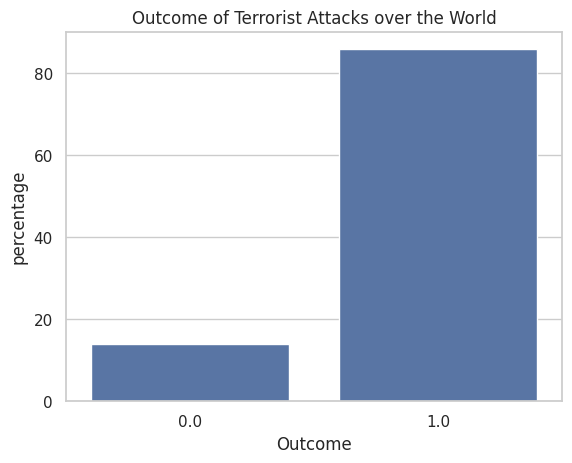

In [ ]:
sns.barplot(x = 'success', y = 'percentage', data=succ)
plt.title("Outcome of Terrorist Attacks over the World")
plt.xlabel("Outcome")

**Of all the 1210 attacks 85.8% were successful, while 14% was unsuccessful.**

## **Terrorist Attacks in United States**

In [ ]:
United_States = df[(df['Country'] == 'United States')]
United_States.head(5)

,eventid,Year,Month,Day,Country,Region,state,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success
5,197001010002,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,1.0
7,197001020002,1970,1,2,United States,North America,California,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives,NaN,1.0
8,197001020003,1970,1,2,United States,North America,Wisconsin,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,1.0
9,197001030001,1970,1,3,United States,North America,Wisconsin,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,1.0
10,197001050001,1970,1,1,United States,North America,Wisconsin,Baraboo,43.468500,-89.744299,Bombing/Explosion,0.0,0.0,Badger Army ammo depot.,NaN,"Weather Underground, Weathermen",Military,Explosives,NaN,0.0


In [ ]:
#how many number of attacks where there in India
United_States_attacks = United_States['eventid'].count()
print('There were',United_States_attacks ,'attacks in United States.')

There were 740 attacks in United States.


In [ ]:
United_States_success = United_States.groupby('success').size().reset_index(name='count')
United_States_success['percentage'] = United_States_success['count'] / United_States_attacks * 100
United_States_success

,success,count,percentage
0,0.0,128,17.297297
1,1.0,612,82.702703


Text(0.5, 0, 'Outcome')

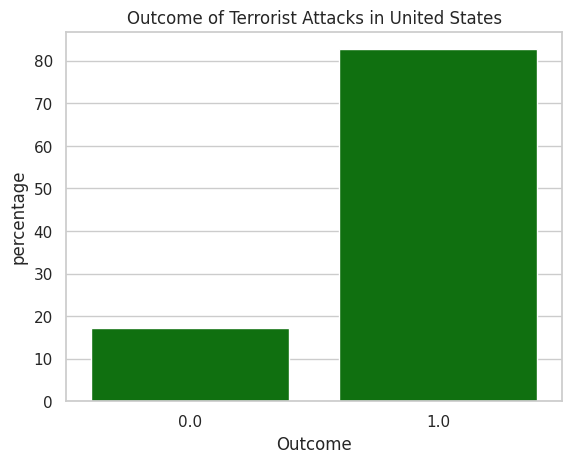

In [ ]:
sns.barplot(x='success', y='percentage', data = United_States_success, color='green')
plt.title("Outcome of Terrorist Attacks in United States")
plt.xlabel("Outcome")

### **Of the 740 attacks in United States, 82.7% were successful, while 17.2% was unsuccessful.**

## **Attack types in United States and their success rates.**


In [ ]:
attack_types_United_States = United_States.groupby(['AttackType','success']).size().reset_index(name='count')
attack_types_United_States

,AttackType,success,count
0,Armed Assault,0.0,5
1,Armed Assault,1.0,44
2,Assassination,0.0,5
3,Assassination,1.0,10
4,Bombing/Explosion,0.0,89
5,Bombing/Explosion,1.0,349
6,Facility/Infrastructure Attack,0.0,27
7,Facility/Infrastructure Attack,1.0,202
8,Hijacking,0.0,2
9,Hijacking,1.0,1


Text(0.5, 1.0, 'Types of attacks in United States')

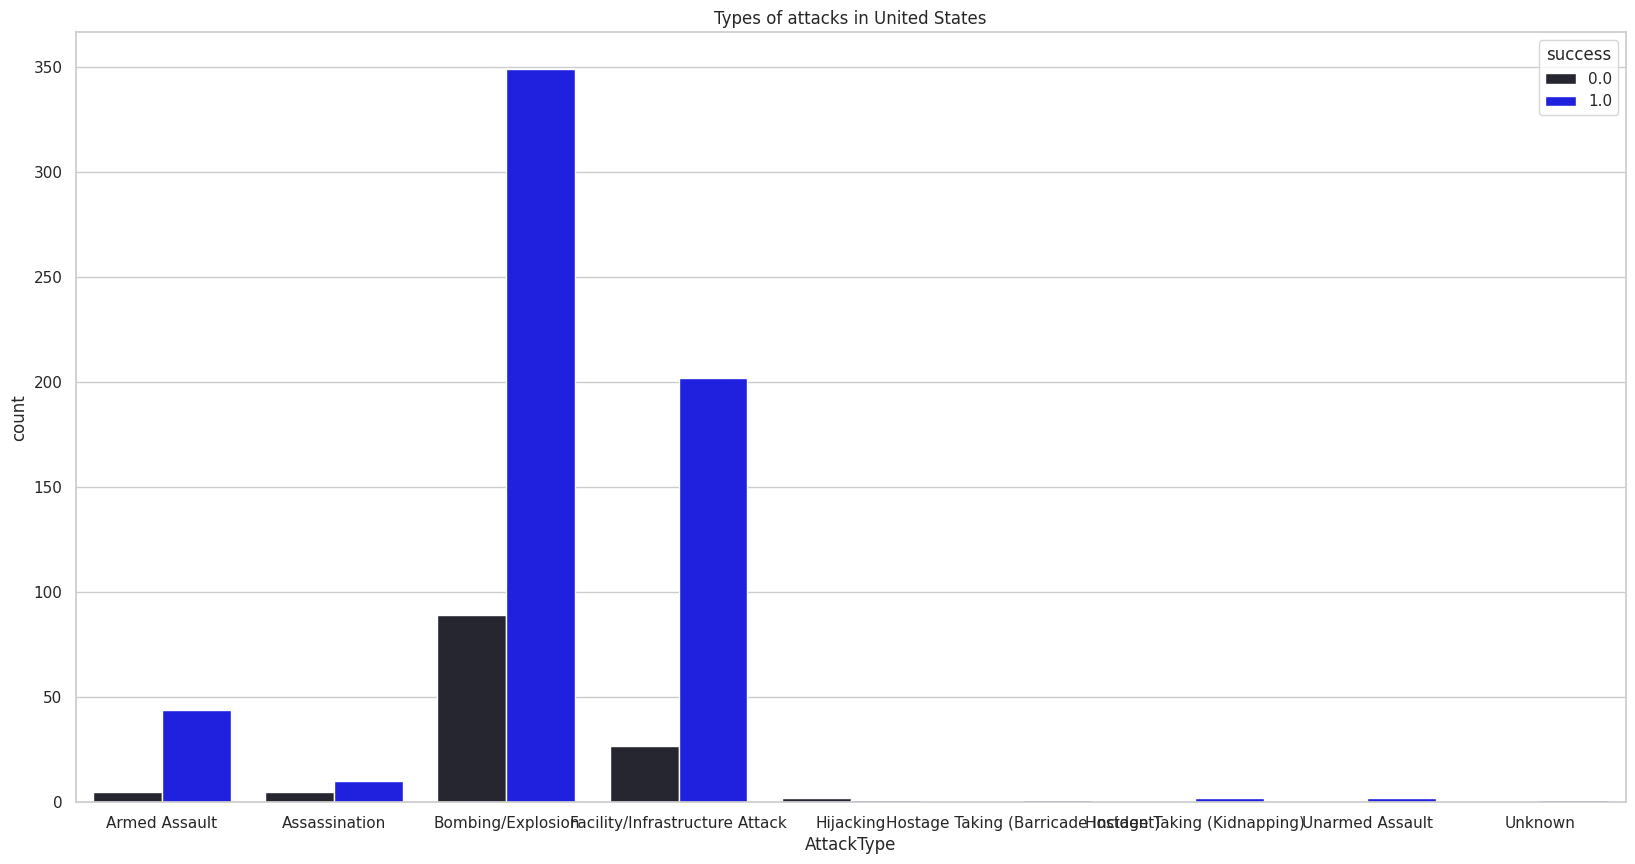

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='AttackType', y='count', hue='success', data=attack_types_United_States, color = "blue")
plt.title("Types of attacks in United States")

In [ ]:
#number of kills
nkills_United_States = United_States.groupby('AttackType')[['Killed']].sum().reset_index()
nkills_United_States

,AttackType,Killed
0,Armed Assault,26.0
1,Assassination,12.0
2,Bombing/Explosion,13.0
3,Facility/Infrastructure Attack,1.0
4,Hijacking,0.0
5,Hostage Taking (Barricade Incident),0.0
6,Hostage Taking (Kidnapping),4.0
7,Unarmed Assault,0.0
8,Unknown,1.0


<Axes: xlabel='AttackType', ylabel='Killed'>

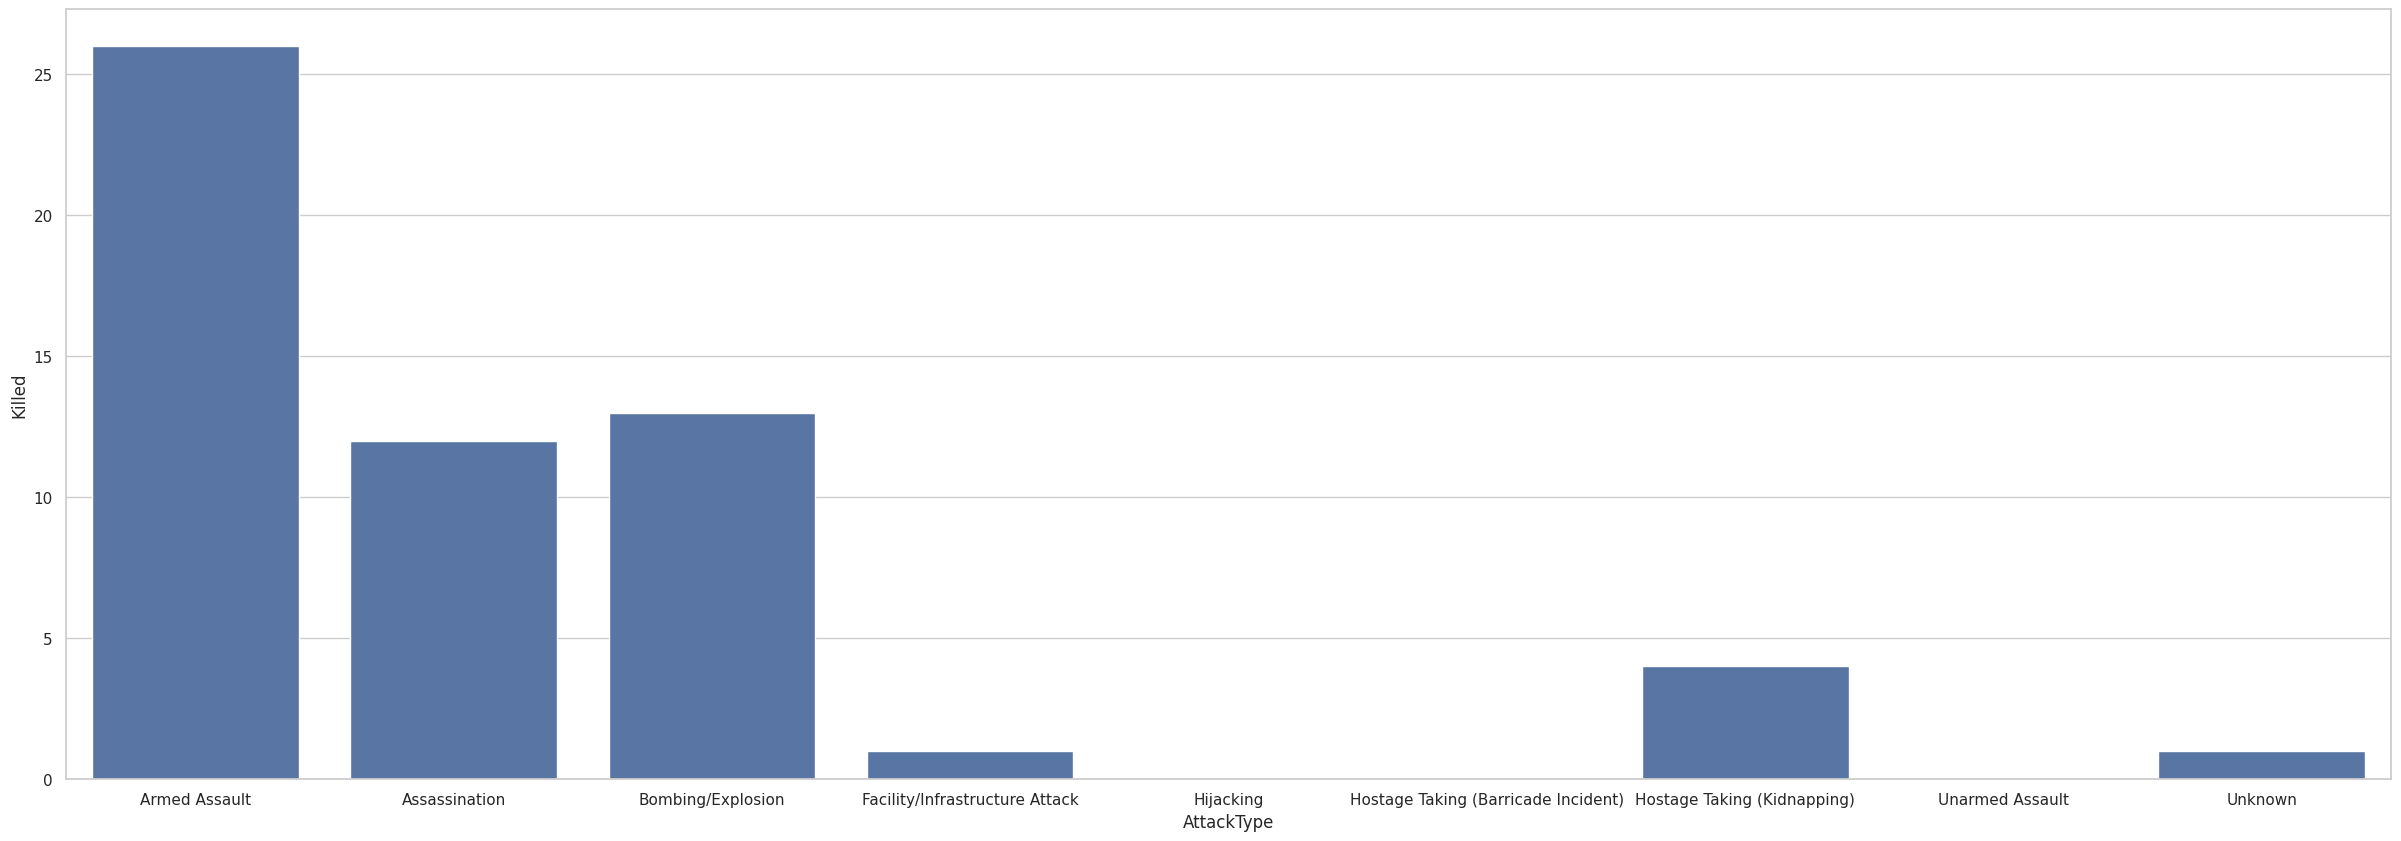

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x='AttackType', y='Killed', data=nkills_United_States)

## **Conclusion**

**Terrorism Attacks all around the world is becoming increasingly a problem! The number of terrorist attacks in the United States , United Kingdom and Turkey increased significantly.
85.86% of attacks have been successful and 14% unsuccessful, with bombing/ explosion causing the most casualties.**

### Most victims in United States from a terror attack are from Armed Assaults, Assassination and Bombing/Explosion .
### Furthermore, Hostage (kidnapping) was also a major issue in United States.